In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

# Data Loading

In [4]:
# Load the dataset
train_df = pd.read_csv("training data.csv")
test_df = pd.read_csv("testing data.csv")

# EDA

In [3]:
train_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
# Display the first few rows of the dataset
print(train_df.head())

         Country  Year      Status  Life expectancy   Adult Mortality  \
0          Malta  2008   Developed              80.0             64.0   
1          Congo  2005  Developing              55.3            394.0   
2   Burkina Faso  2009  Developing              56.9            283.0   
3  Guinea-Bissau  2011  Developing              57.1            289.0   
4        Myanmar  2007  Developing              64.5            217.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0              0     7.14             2655.573684         86.0         1  ...   
1              8     2.03                0.000000          NaN       146  ...   
2             44     4.55               81.143047         92.0     54118  ...   
3              4     3.57               40.453674         86.0         0  ...   
4             58     0.26                0.530573         85.0      1088  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS           GDP  Populat

In [5]:
print(train_df.tail())

            Country  Year      Status  Life expectancy   Adult Mortality  \
2051          Malta  2011   Developed              87.0             59.0   
2052  Guinea-Bissau  2010  Developing              56.7            287.0   
2053          Haiti  2007  Developing              61.8            266.0   
2054          Italy  2003   Developed              79.9             72.0   
2055        Eritrea  2005  Developing              59.4             34.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
2051              0     6.91             3601.287457         82.0         3   
2052              4     3.21               53.307827         83.0        26   
2053             17     6.08               56.778587          NaN         0   
2054              2     9.30             3519.258515         95.0     10982   
2055              7     1.07                5.064689         96.0        19   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         

In [6]:
train_df.shape

(2056, 22)

In [7]:
train_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
# Forward fill missing values
train_df.ffill(inplace=True)
test_df.ffill(inplace=True)

In [9]:
# Calculate mean and median for 'Life expectancy' column
mean_life_expectancy = train_df['Life expectancy '].mean()
median_life_expectancy = train_df['Life expectancy '].median()

print("Mean Life Expectancy:", mean_life_expectancy)
print("Median Life Expectancy:", median_life_expectancy)

Mean Life Expectancy: 69.40141050583658
Median Life Expectancy: 72.2


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2056 non-null   object 
 1   Year                             2056 non-null   int64  
 2   Status                           2056 non-null   object 
 3   Life expectancy                  2056 non-null   float64
 4   Adult Mortality                  2056 non-null   float64
 5   infant deaths                    2056 non-null   int64  
 6   Alcohol                          2056 non-null   float64
 7   percentage expenditure           2056 non-null   float64
 8   Hepatitis B                      2056 non-null   float64
 9   Measles                          2056 non-null   int64  
 10   BMI                             2056 non-null   float64
 11  under-five deaths                2056 non-null   int64  
 12  Polio               

In [11]:
# Summary statistics
print(train_df.describe())

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2056.000000       2056.000000      2056.000000    2056.000000   
mean   2007.555447         69.401411       163.613327      28.689689   
std       4.617942          9.446048       123.049626     111.346455   
min    2000.000000         39.000000         1.000000       0.000000   
25%    2004.000000         63.375000        74.000000       0.000000   
50%    2008.000000         72.200000       144.000000       3.000000   
75%    2012.000000         75.700000       226.000000      21.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2056.000000             2056.000000  2056.000000    2056.000000   
mean      4.613176              707.310568    80.719844    2296.159047   
std       4.036653             1917.736859    25.250460   11610.468056   
min       0.010000                0.000000     1.000000

In [12]:
# Identify object columns
object_columns = train_df.select_dtypes(include=['object']).columns

# Convert object columns to categorical
train_df[object_columns] = train_df[object_columns].astype('category')
test_df[object_columns] = test_df[object_columns].astype('category')

In [13]:
# Check the data types of each column
print(train_df.dtypes)

Country                            category
Year                                  int64
Status                             category
Life expectancy                     float64
Adult Mortality                     float64
infant deaths                         int64
Alcohol                             float64
percentage expenditure              float64
Hepatitis B                         float64
Measles                               int64
 BMI                                float64
under-five deaths                     int64
Polio                               float64
Total expenditure                   float64
Diphtheria                          float64
 HIV/AIDS                           float64
GDP                                 float64
Population                          float64
 thinness  1-19 years               float64
 thinness 5-9 years                 float64
Income composition of resources     float64
Schooling                           float64
dtype: object


In [14]:
# Check for missing values
print(train_df.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [15]:
from scipy import stats

# Function to identify outliers using Z-score method for specific columns
def identify_outliers_zscore(df, columns, threshold=3):
    outliers = {}
    for column in columns:
        # Calculate Z-scores for each data point in the column
        z_scores = stats.zscore(df[column])
        # Find data points with Z-scores beyond the threshold
        column_outliers = df[(z_scores < -threshold) | (z_scores > threshold)]
        outliers[column] = column_outliers
    return outliers

# Specify the columns for which you want to identify outliers
new_selected_columns = ['Life expectancy ', 'Polio', 'Total expenditure']

# Call the function and get outliers for specific columns using Z-score
outliers_zscore = identify_outliers_zscore(train_df, new_selected_columns)

# Print outliers for each selected column
for column, outlier_df in outliers_zscore.items():
    print(f"Outliers for {column}:")
    print(outlier_df)

Outliers for Life expectancy :
           Country  Year      Status  Life expectancy   Adult Mortality  \
806   Sierra Leone  2000  Developing              39.0            533.0   
1664  Sierra Leone  2001  Developing              41.0            519.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
806              29     3.97               20.395683         96.0      3575   
1664             30     4.21               33.346915         95.0       649   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
806   ...   46.0              13.63         44.0        1.2  139.314773   
1664  ...   38.0              11.83         38.0        1.5  227.779471   

      Population   thinness  1-19 years   thinness 5-9 years  \
806    4564297.0                    1.3                  1.4   
1664   4739147.0                    1.1                  1.2   

      Income composition of resources  Schooling  
806                             0.2

# Feature selection

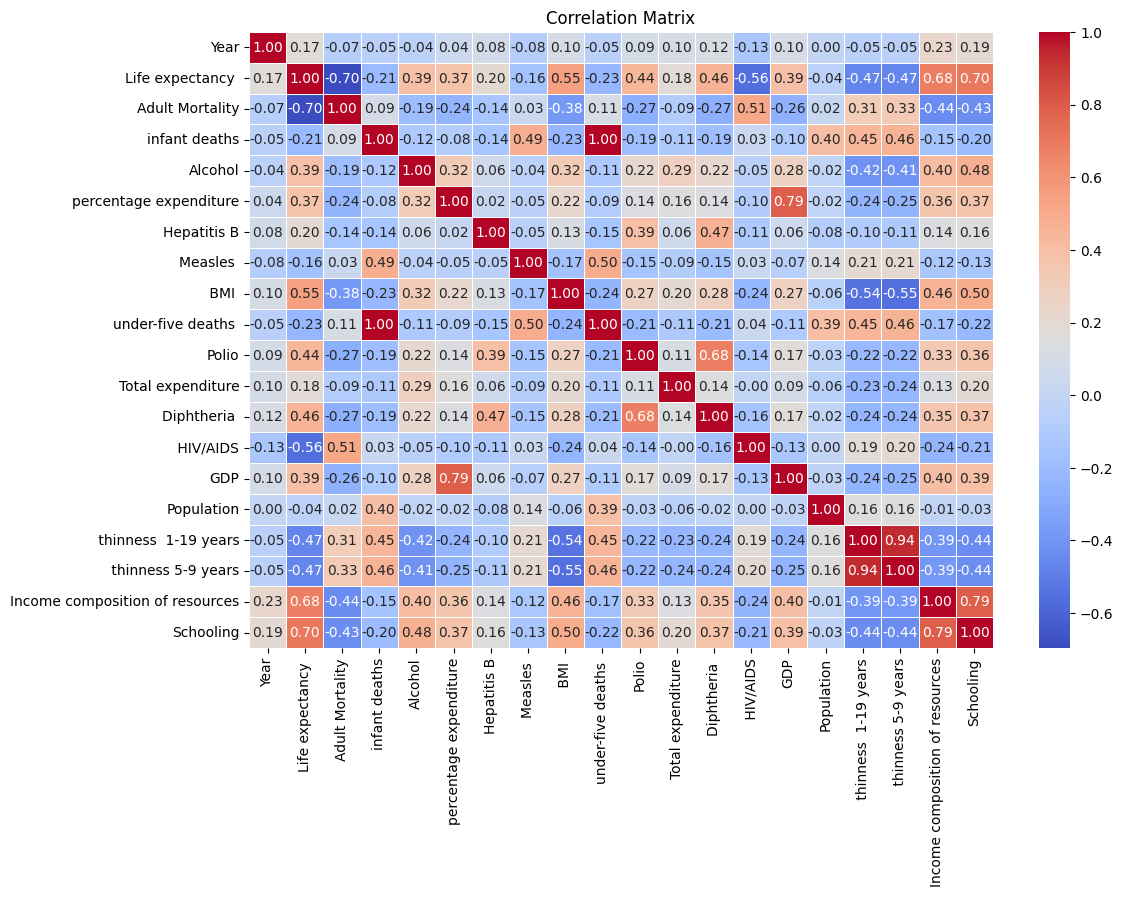

In [16]:
# Exclude non-numeric columns before calculating correlation matrix
numeric_columns = train_df.select_dtypes(include=['number']).columns
corr_matrix = train_df[numeric_columns].corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


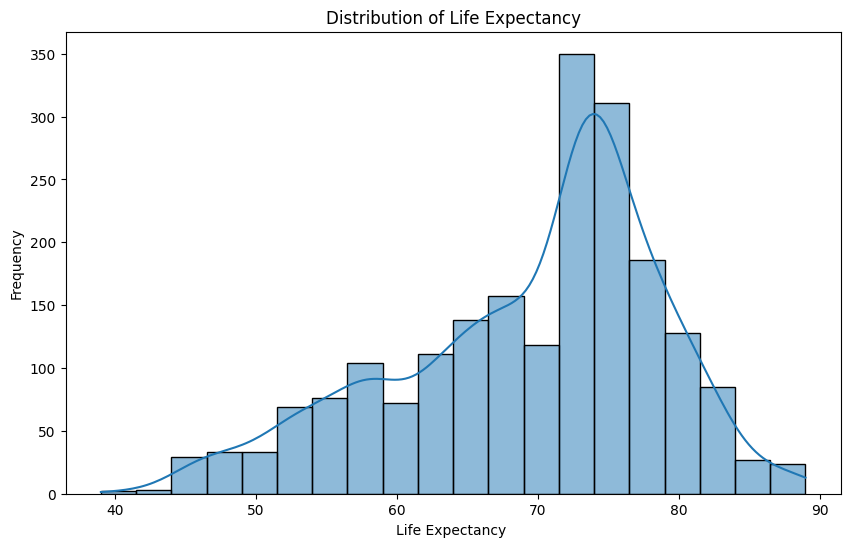

In [17]:
# Distribution of the target variable (Life Expectancy)
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Life expectancy '], bins=20, kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy ')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


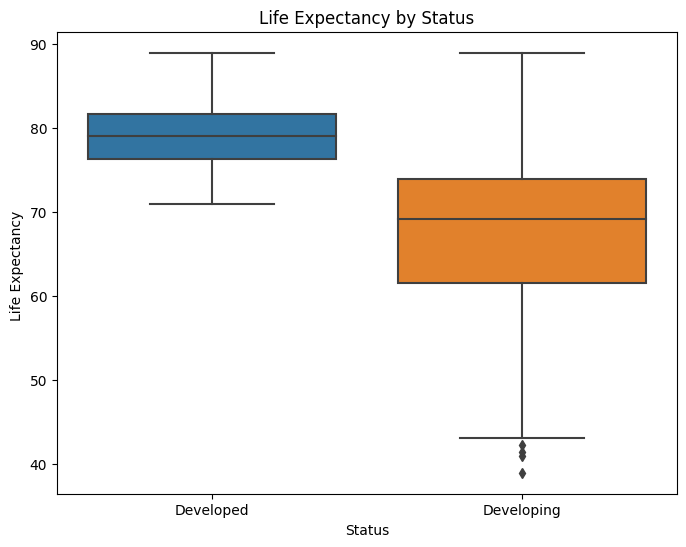

In [18]:
# Boxplot of Life Expectancy vs. Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=train_df)
plt.title('Life Expectancy by Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy ')
plt.show()

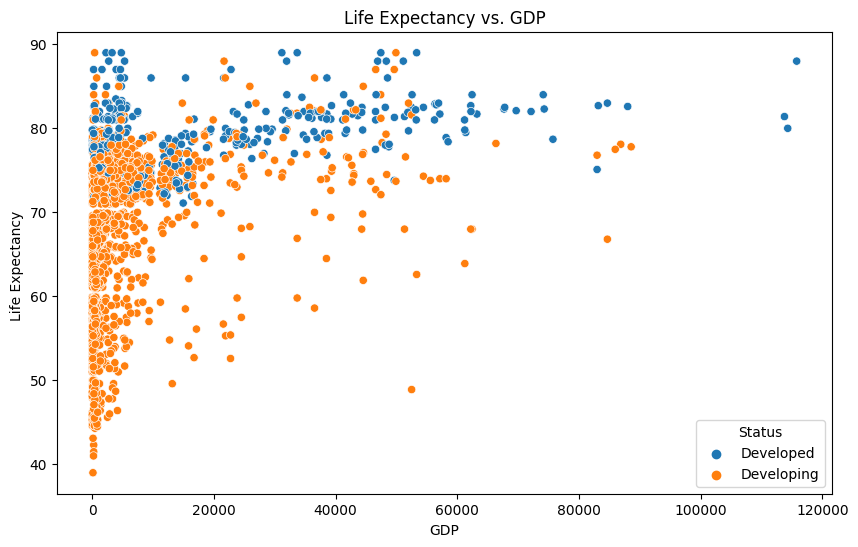

In [19]:
# Scatterplot of Life Expectancy vs. GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy ', data=train_df, hue='Status')
plt.title('Life Expectancy vs. GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy ')
plt.show()

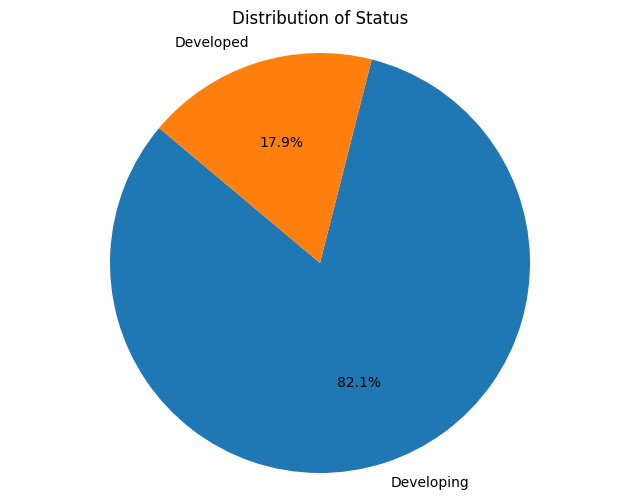

In [20]:
# Pie chart for the distribution of 'Status' variable
status_counts = train_df['Status'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

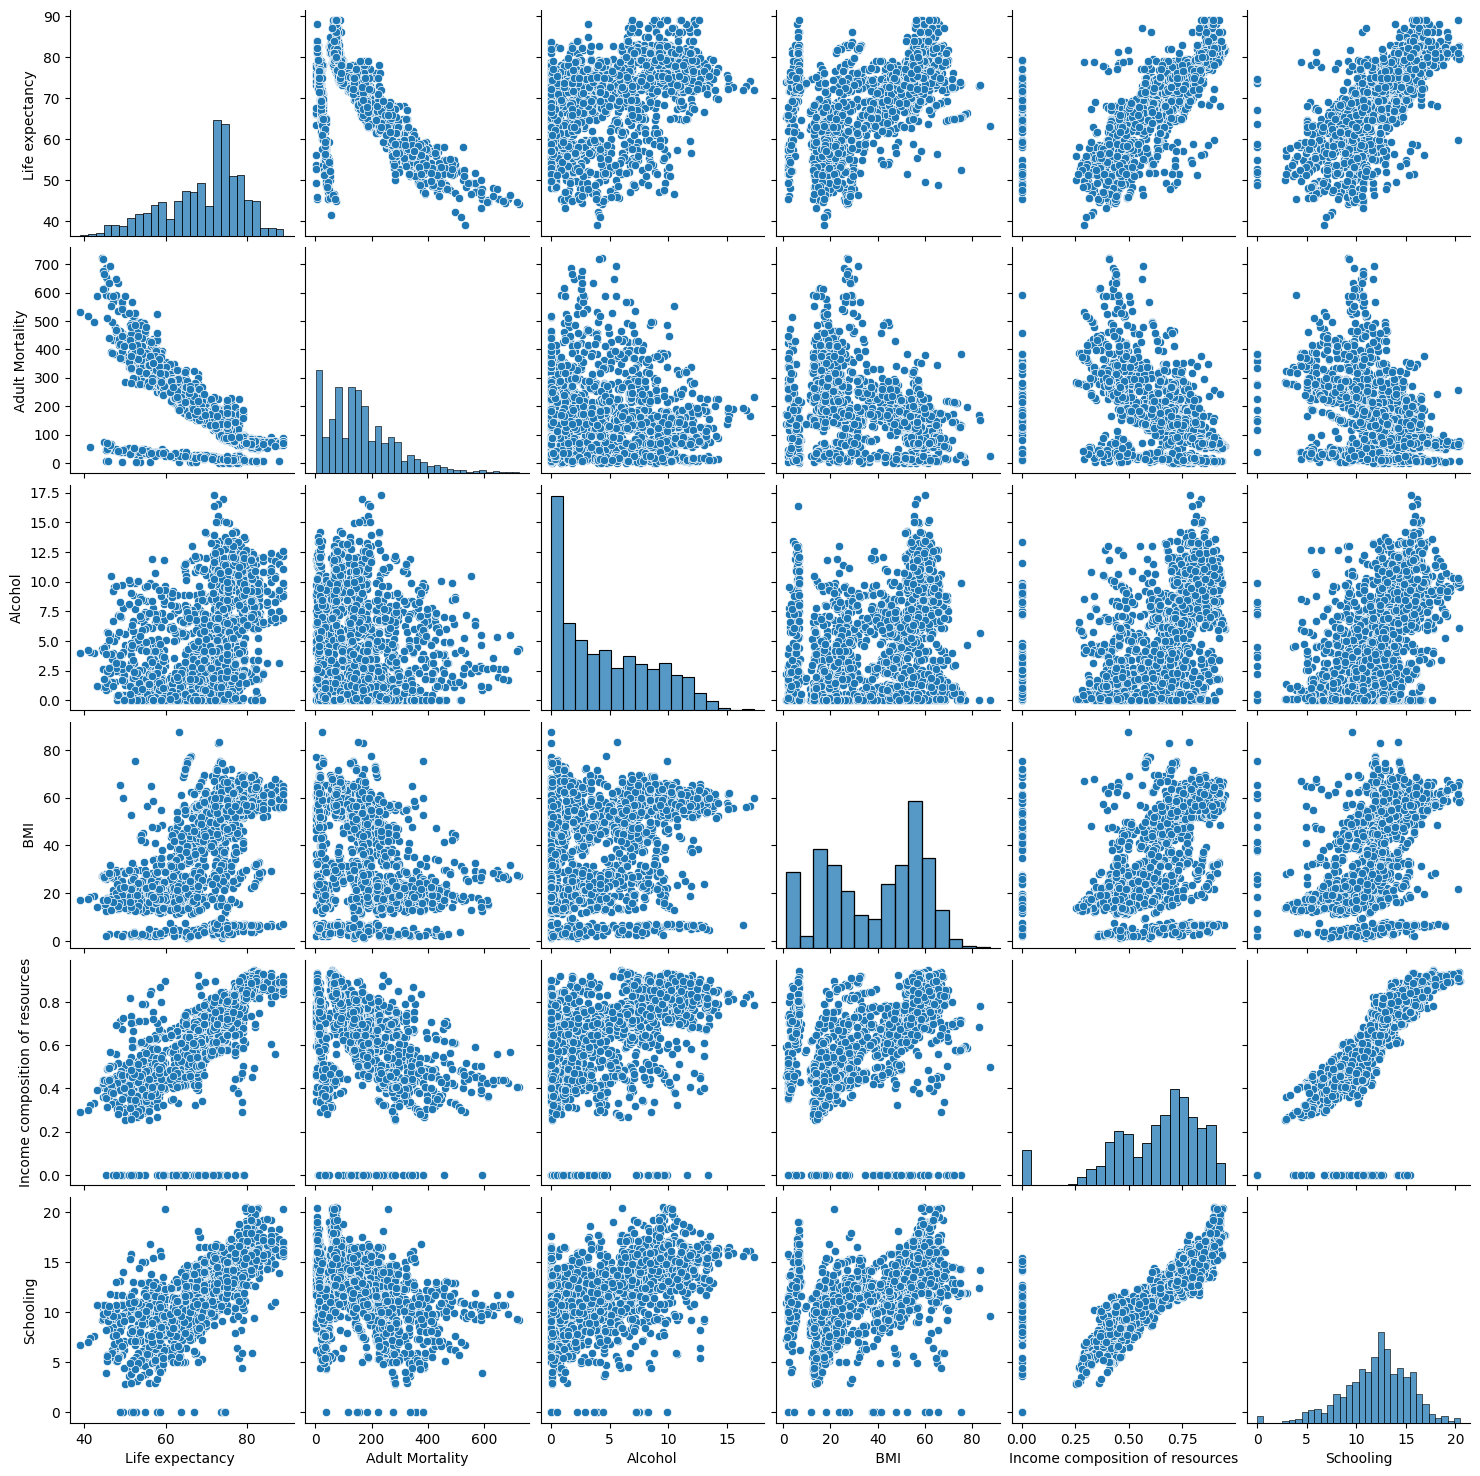

In [21]:
# Pairplot of selected variables
sns.pairplot(train_df[['Life expectancy ', 'Adult Mortality', 'Alcohol', ' BMI ', 'Income composition of resources', 'Schooling']])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


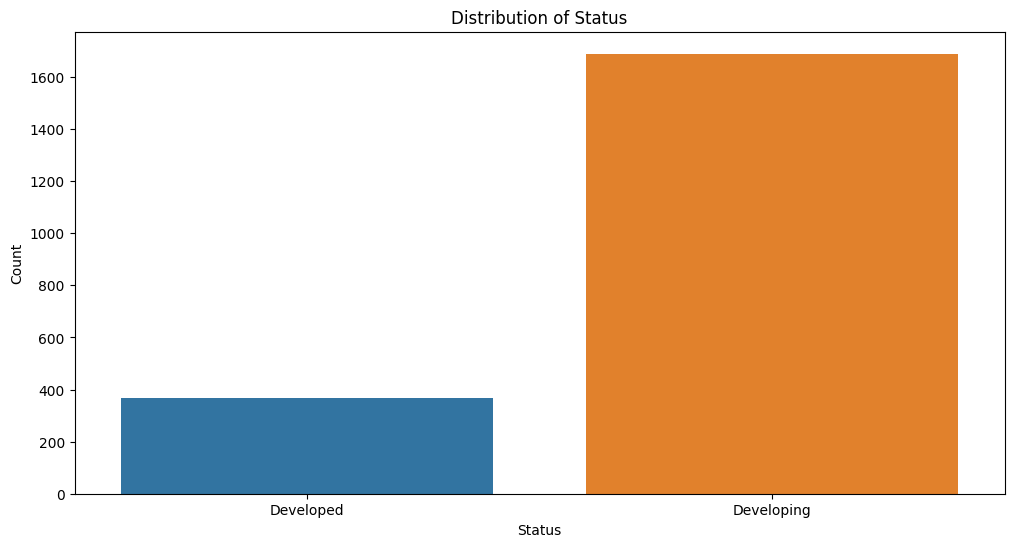

In [22]:
# Distribution of categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='Status', data=train_df)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

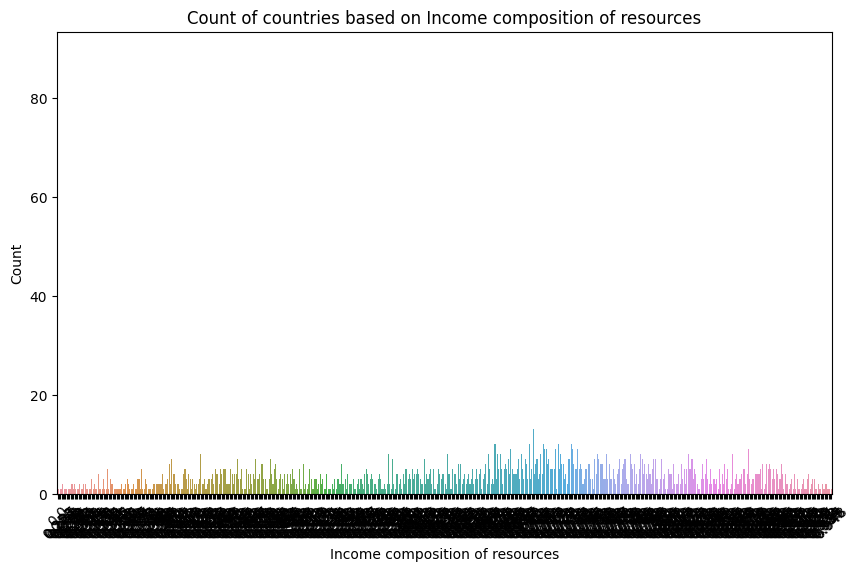

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Income composition of resources')
plt.xlabel('Income composition of resources')
plt.ylabel('Count')
plt.title('Count of countries based on Income composition of resources')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


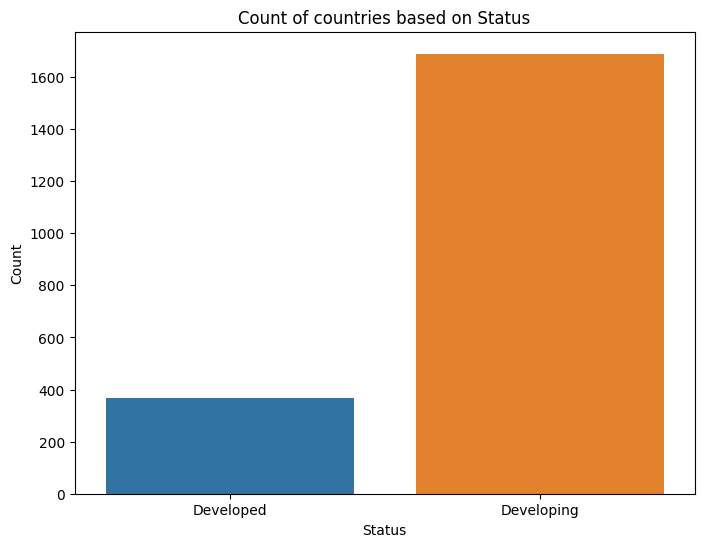

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_df, x='Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of countries based on Status')
plt.show()

/tmp/ipykernel_18/2130690388.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Life expectancy '], kde=False, bins=20)


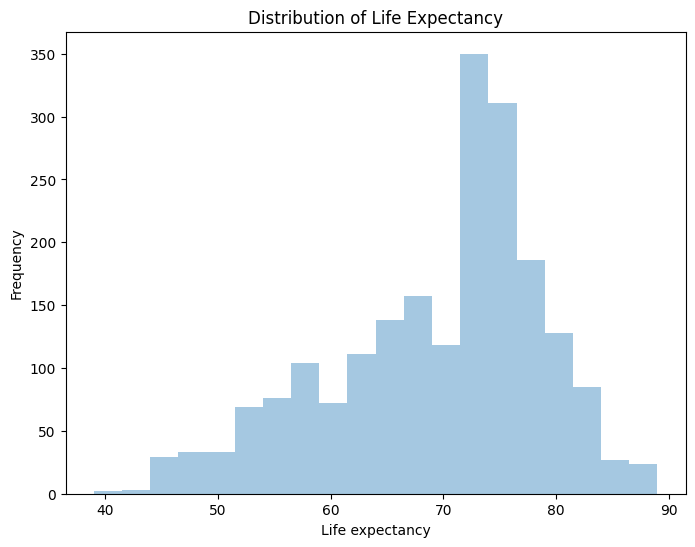

In [25]:
plt.figure(figsize=(8, 6))
sns.distplot(train_df['Life expectancy '], kde=False, bins=20)
plt.xlabel('Life expectancy')
plt.ylabel('Frequency')
plt.title('Distribution of Life Expectancy')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


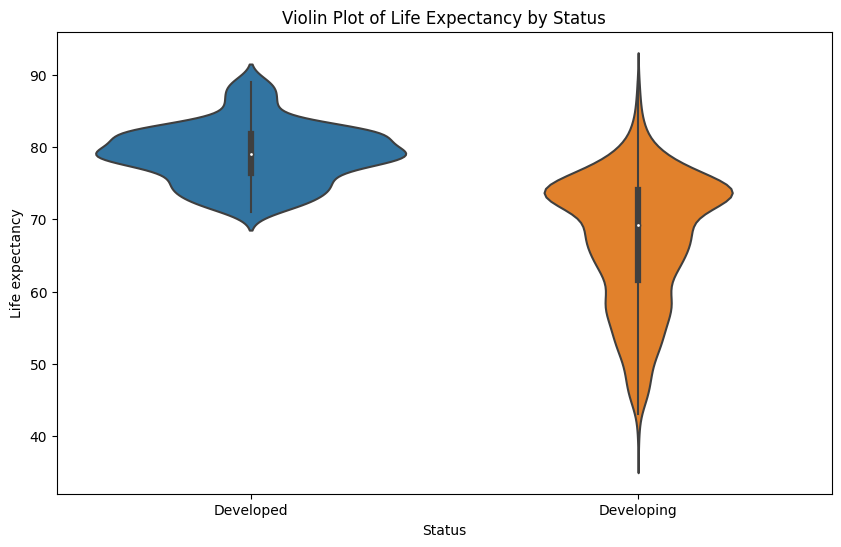

In [26]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_df, x='Status', y='Life expectancy ')
plt.xlabel('Status')
plt.ylabel('Life expectancy')
plt.title('Violin Plot of Life Expectancy by Status')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Figure size 1000x600 with 0 Axes>

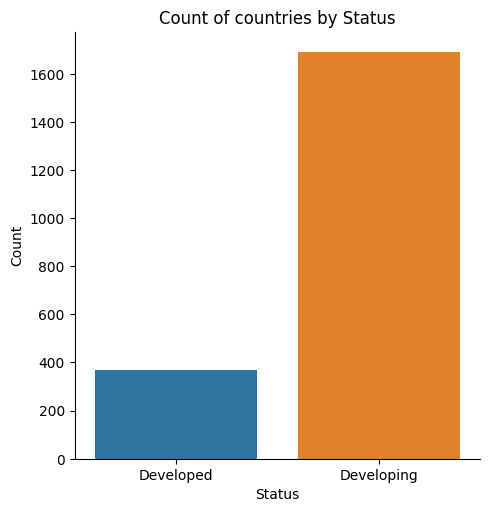

In [27]:
plt.figure(figsize=(10, 6))
sns.catplot(data=train_df, x='Status', kind='count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Count of countries by Status')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

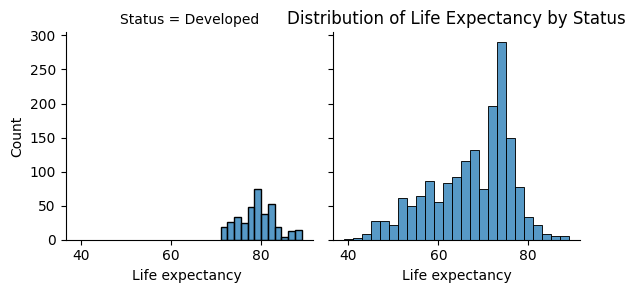

In [28]:
plt.figure(figsize=(10, 6))
g = sns.FacetGrid(train_df, col="Status")
g.map(sns.histplot, "Life expectancy ")
plt.xlabel('Life expectancy')
plt.ylabel('Count')
plt.title('Distribution of Life Expectancy by Status')
plt.show()

# Data Cleaning and Preprocessing

In [5]:
# Data Cleaning and Preprocessing 
train_df.ffill(inplace=True)  

In [6]:
# Columns to drop
columns_to_drop = ['infant deaths', 'percentage expenditure', 'Hepatitis B', 'Measles ', 
                   'under-five deaths ', 'Total expenditure', 'Population', 
                   ' thinness  1-19 years', ' thinness 5-9 years', 
                   'Income composition of resources', 'Schooling']

In [7]:
# Split the data into features (X) and target variable (y)
X = train_df.drop(['Life expectancy '] + columns_to_drop, axis=1)
y = train_df['Life expectancy ']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Select only numeric columns for imputation
numeric_columns = X_train.select_dtypes(include=['number']).columns

In [11]:
# Create SimpleImputer with mean strategy and fit it to the training data
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train[numeric_columns])

SimpleImputer()

In [12]:
# Impute missing values for both training and testing data
X_train_imputed = X_train.copy()
X_train_imputed[numeric_columns] = imputer.transform(X_train[numeric_columns])
X_test_imputed = X_test.copy()
X_test_imputed[numeric_columns] = imputer.transform(X_test[numeric_columns])

In [13]:
# Select only numeric columns for scaling
numeric_columns = X_train_imputed.select_dtypes(include=['number']).columns

In [14]:
# Standardize only the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed[numeric_columns])
X_test_scaled = scaler.transform(X_test_imputed[numeric_columns])

# Model Training

In [15]:
# Create and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [16]:
# Create and train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Create and train Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

# Model Evaluation

In [16]:
# Function to evaluate a model and print RMSE
def evaluate_model(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Root Mean Squared Error: {rmse}")


In [17]:
# Function to evaluate a model and print R2 score
def evaluate_model_r2(model, X_test_scaled, y_test):
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")

In [18]:
# Evaluate Linear Regression model
print("Linear Regression:")
evaluate_model(linear_model, X_test_scaled, y_test)
evaluate_model_r2(linear_model, X_test_scaled, y_test)

# Evaluate Random Forest model
print("\nRandom Forest:")
evaluate_model(rf_model, X_test_scaled, y_test)
evaluate_model_r2(rf_model, X_test_scaled, y_test)

# Evaluate Gradient Boosting model
print("\nGradient Boosting:")
evaluate_model(gb_model, X_test_scaled, y_test)
evaluate_model_r2(gb_model, X_test_scaled, y_test)

Linear Regression:
Root Mean Squared Error: 4.908682158057206
R2 Score: 0.7371947969645473

Random Forest:
Root Mean Squared Error: 2.0373232069346674
R2 Score: 0.9547285922368968

Gradient Boosting:
Root Mean Squared Error: 2.350145651050962
R2 Score: 0.9397587891761214


In [19]:
# Choose the best model based on performance
best_model = min([linear_model, rf_model, gb_model], key=lambda model: mean_squared_error(y_test, model.predict(X_test_scaled)))

In [20]:
import joblib

# Assuming best_model is your trained model

# Save the best model as a pickle file
joblib.dump(rf_model, 'best_model.pkl')

# Later, you can load the model using:
# loaded_model = joblib.load('best_model.pkl')

['best_model.pkl']

# Hyperparameter Tuning with Grid Search

In [21]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_rf_model = grid_search.best_estimator_

In [22]:
# Get the best hyperparameters
best_hyperparams = grid_search.best_params_
print("Best Hyperparameters:", best_hyperparams)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Model:", best_model)

# Get evaluation scores
cv_results = grid_search.cv_results_
print("Evaluation Scores:", cv_results['mean_test_score'])

# Get cross-validation results
cv_results_df = pd.DataFrame(grid_search.cv_results_)
print("Cross-Validation Results:")
print(cv_results_df[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'mean_test_score', 'std_test_score']])


# Get grid search attributes
print("Grid Search Attributes:")
print("Parameter Grid:", grid_search.param_grid)
print("Number of Cross-Validation Folds:", grid_search.cv)
print("Scoring Metric:", grid_search.scoring)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Model: RandomForestRegressor(n_estimators=200, random_state=42)
Evaluation Scores: [-6.09457467 -5.99185724 -6.01159712 -6.22174413 -6.10361279 -6.11774955
 -6.52840996 -6.43607196 -6.44602866 -9.63002085 -9.56625412 -9.58320573
 -9.63541237 -9.56841264 -9.58559981 -9.66067924 -9.59089642 -9.60815722
 -6.27245712 -6.16649975 -6.16501238 -6.30509424 -6.2148352  -6.22254664
 -6.57888034 -6.49416191 -6.50662255]
Cross-Validation Results:
   param_n_estimators param_max_depth param_min_samples_split  \
0                 100            None                       2   
1                 200            None                       2   
2                 300            None                       2   
3                 100            None                       5   
4                 200            None                       5   
5                 300            None                       5   
6             

# Preprocessing for the test set

In [23]:
test_df.ffill(inplace=True)  # Forward fill missing values
X_pred = test_df.drop(columns_to_drop, axis=1)  # Drop specified columns

In [24]:
# Impute missing values for the test set
X_pred_imputed = imputer.transform(X_pred[numeric_columns])

In [25]:
# Scale the preprocessed test data
X_pred_scaled = scaler.transform(X_pred_imputed)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
# Make predictions using the best model
predictions = best_model.predict(X_pred_scaled)

In [27]:
# Add predictions to the DataFrame
test_df['Predicted Life Expectancy'] = predictions

In [35]:
#Display the DataFrame with Row_id and Predicted Life Expectancy columns
print(test_df[['Country', 'Year', 'Status', 'Adult Mortality',
        'Alcohol', ' BMI ', 'Polio',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Predicted Life Expectancy']])

# Save the DataFrame to a CSV file
test_df[['Country', 'Year', 'Status', 'Adult Mortality',
        'Alcohol', ' BMI ', 'Polio',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Predicted Life Expectancy']].to_csv('Life_expectancy.csv', index=False)


                  Country  Year      Status  Adult Mortality  Alcohol   BMI   \
0    Syrian Arab Republic  2006  Developing            123.0     0.97   48.5   
1                 Croatia  2006   Developed            113.0    11.83   58.1   
2              Montenegro  2007  Developing            125.0     4.98   57.2   
3                 Bahrain  2014  Developing              7.0     1.57   62.9   
4                   Kenya  2000  Developing            428.0     1.51   14.4   
..                    ...   ...         ...              ...      ...    ...   
877                  Iraq  2008  Developing            167.0     0.17   54.5   
878                Latvia  2001   Developed            228.0     6.68   55.7   
879             Australia  2004   Developed             69.0     9.84    6.9   
880                Sweden  2011   Developed             58.0     7.40   57.7   
881              Mongolia  2003  Developing            271.0     1.31    4.5   

     Polio  Diphtheria    HIV/AIDS     